<a href="https://colab.research.google.com/github/linhmitless/StatColabNotebook/blob/master/Inference_About_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import pandas as pd
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## One-sample t confidence interval

### Load the data

In [0]:
!wget https://www.dropbox.com/s/ehibtnrx86z3n3z/BodyTemp.csv?dl=0

--2019-01-27 19:40:22--  https://www.dropbox.com/s/ehibtnrx86z3n3z/BodyTemp.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ehibtnrx86z3n3z/BodyTemp.csv [following]
--2019-01-27 19:40:22--  https://www.dropbox.com/s/raw/ehibtnrx86z3n3z/BodyTemp.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc14b7c495cfabe6aa0236deeb6d.dl.dropboxusercontent.com/cd/0/inline/AaPVWbPFLPOsVLqYBOg1y7jeLJpsJD0noooyu1rro-dgx3jnXhFnhnBt2KzS610dhPwG8L8dVMJNJuddNWvs2sCzPNnN1BuDxSYnGZZSGlpTsfdR8fR3zwxOutCkvFV7Hy0/file# [following]
--2019-01-27 19:40:22--  https://uc14b7c495cfabe6aa0236deeb6d.dl.dropboxusercontent.com/cd/0/inline/AaPVWbPFLPOsVLqYBOg1y7jeLJpsJD0noooyu1rro-dgx3jnXhFnhnBt2KzS610dhPwG8L8dVMJNJuddNWvs2sCzPNnN1BuDxSYnGZZSGlpTs

### Create a data frame

In [0]:
df = pd.read_csv('BodyTemp.csv?dl=0')

### Look at the data

In [0]:
df.head()

,Body Temp,Gender,Heart Rate
0,96.3,2,70
1,96.7,2,71
2,96.9,2,74
3,97.0,2,80
4,97.1,2,73


Make a histogram

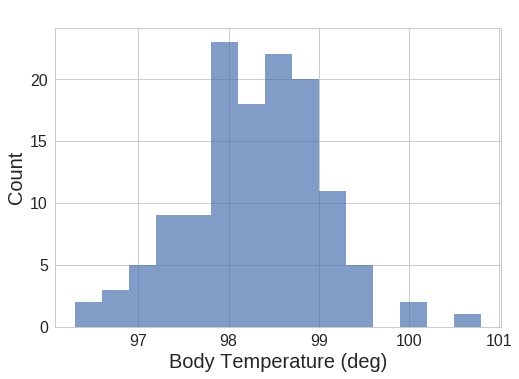

In [0]:
df.hist('Body Temp',bins = 15,alpha = .7)

plt.xlabel('Body Temperature (deg)',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.title(' ',fontsize = 20)

plt.tick_params(labelsize = 16)

plt.show()

Use a q-q plot to assess how well a Normal distribution models the data.

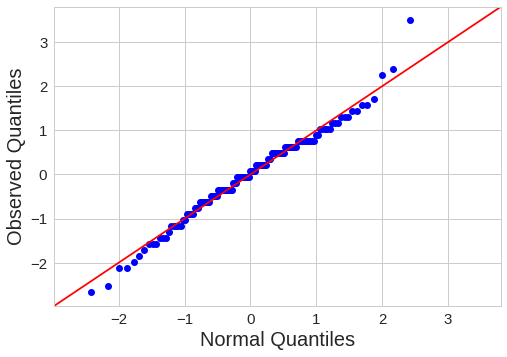

In [0]:
fig = sm.qqplot(df['Body Temp'], dist="norm",fit = True,line = '45')
plt.xlabel('Normal Quantiles',fontsize=20)
plt.ylabel('Observed Quantiles',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('')

plt.show()

### Compute the one-sample t confidence interval

In [0]:
#Get a column of the data frame
X = df['Body Temp']

#Compute the components of a confidence interval
mu = X.describe()['mean'] #can also use mu = np.mean(X)
sd = X.describe()['std'] #can also use sd = np.std(X,ddof = 1)
n = np.size(X)
se = sd/np.sqrt(n)
v = n - 1
c_level = 0.95

#Combine the components to form confidence interval. This function computes the necessary t critical value.
stats.t.interval(c_level,loc = mu, scale = se,df = v)

(98.12200290560803, 98.3764586328535)

## One-sample t test

We will use the body temperature data again, so we have alread done the initial steps of importing the data, creating a data frame, and plotting the data.

### One-sample t test for the mean

In [0]:
#Specify the mean under the null hypothesis
null_mu = 98.6

#Get a column of the data frame
X = df['Body Temp']

#Find the t statistic and p-value
stats.ttest_1samp(X, null_mu)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

You can compare the p-value to a significance level to make a decision.

## Paired-samples t confidence interval

### Load the data

In [0]:
!wget https://www.dropbox.com/s/brj261dcjynib17/DrugAbsorption.csv?dl=0

--2019-01-27 20:18:45--  https://www.dropbox.com/s/brj261dcjynib17/DrugAbsorption.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brj261dcjynib17/DrugAbsorption.csv [following]
--2019-01-27 20:18:46--  https://www.dropbox.com/s/raw/brj261dcjynib17/DrugAbsorption.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc556ac78e3fd20d66b2c33687.dl.dropboxusercontent.com/cd/0/inline/AaPdElreAoW84nHm2doBzsX9z2HPViOwwUF3AOoMzmss0Epke50hdzXDkzj5_1jvYPKW-C4k5HYH-0HAfLELPvFVu7G4Ind9X7kmDGDAXZUbAXPWD2VKtCgUyBIWKXAECxU/file# [following]
--2019-01-27 20:18:47--  https://ucbc556ac78e3fd20d66b2c33687.dl.dropboxusercontent.com/cd/0/inline/AaPdElreAoW84nHm2doBzsX9z2HPViOwwUF3AOoMzmss0Epke50hdzXDkzj5_1jvYPKW-C4k5HYH-0HAfLELPvFVu

### Create a data frame

In [0]:
df = pd.read_csv('DrugAbsorption.csv?dl=0')

### Look at the data

Look at the data frame to see what variables you have.

In [0]:
df.head()

,Subject,Reference drug,Generic drug
0,15,4108,1755
1,3,2526,1138
2,9,2779,1613
3,13,3852,2254
4,12,1833,1310


We want to examine the differences between the reference and generic drugs. Create a new variable representing this difference.

In [0]:
df['Difference'] = df['Reference drug'] - df['Generic drug']

Look at the data frame to see what changed.

In [0]:
df.head()

,Subject,Reference drug,Generic drug,Difference
0,15,4108,1755,2353
1,3,2526,1138,1388
2,9,2779,1613,1166
3,13,3852,2254,1598
4,12,1833,1310,523


Plot a histogram of the difference.

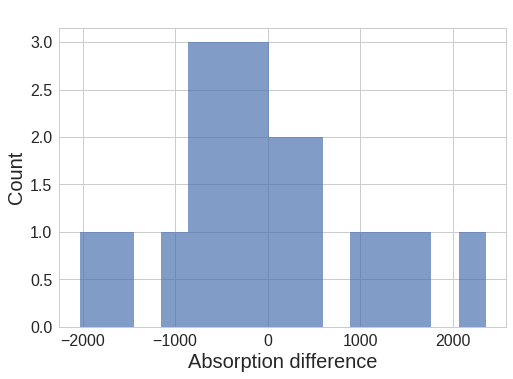

In [0]:
df.hist('Difference',bins = 15,alpha = .7)

plt.xlabel('Absorption difference',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.title(' ',fontsize = 20)

plt.tick_params(labelsize = 16)

plt.show()

Use a Q-Q plot to assess how well a Normal distribution models the data.

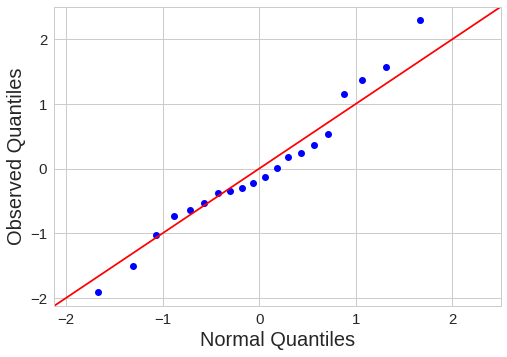

In [0]:
fig = sm.qqplot(df.Difference, dist="norm",fit = True,line = '45')
plt.xlabel('Normal Quantiles',fontsize=20)
plt.ylabel('Observed Quantiles',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('')

plt.show()

### Compute the paired-samples t confidence interval

In [0]:
#Get a column of the data frame
X = df['Difference']

#Compute the components of a confidence interval
mu = X.describe()['mean'] #can also use mu = np.mean(X)
sd = X.describe()['std'] #can also use sd = np.std(X,ddof = 1)
n = np.size(X)
se = sd/np.sqrt(n)
v = n - 1
c_level = 0.95

#Combine the components to form confidence interval. This function computes the necessary t critical value.
stats.t.interval(c_level,loc = mu, scale = se,df = v)

(-538.0662912413607, 464.06629124136066)

## Paired-samples t test

We will use the drug absorptions data again, so we have alread done the initial steps of importing the data, creating a data frame, and plotting the data.

### Paired-sampes t test for the mean

In [0]:
#Specify the mean under the null hypothesis
null_mu_diff = 0

#Get a column of the data frame
X = df['Difference']

#Find the t statistic and p-value
stats.ttest_1samp(X, null_mu_diff)

Ttest_1sampResult(statistic=-0.15455418048827083, pvalue=0.8788027461466698)

You can compare the p-value to a significance level to make a decision.

Here the p-value is very large, so there is no evidence of a difference in means.

## Two-samples confidence interval

### Load the data

In [0]:
!wget https://www.dropbox.com/s/x9x1mvrsypn2r5k/DirectedReading.csv?dl=0

--2019-01-27 20:32:54--  https://www.dropbox.com/s/x9x1mvrsypn2r5k/DirectedReading.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/x9x1mvrsypn2r5k/DirectedReading.csv [following]
--2019-01-27 20:32:55--  https://www.dropbox.com/s/raw/x9x1mvrsypn2r5k/DirectedReading.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7042af20a5696891c756922b2e.dl.dropboxusercontent.com/cd/0/inline/AaO2bTb6XWPdEl8N8GYJQCUfbh0qoWcMCJpbghF9WHtZug0pJfttPyKePjSnnTWPNqaw95lAHdPiJxziskcexJ6py2JchsoxmipJzbeEkJY7p-yFb5CFI-e6Roapa0MXwzE/file# [following]
--2019-01-27 20:32:55--  https://uc7042af20a5696891c756922b2e.dl.dropboxusercontent.com/cd/0/inline/AaO2bTb6XWPdEl8N8GYJQCUfbh0qoWcMCJpbghF9WHtZug0pJfttPyKePjSnnTWPNqaw95lAHdPiJxziskcexJ6p

### Create a data frame

In [0]:
df = pd.read_csv('DirectedReading.csv?dl=0')

### Look at the data

Look at the data frame to see what variables you have.

In [0]:
df.head()

,Treatment,Response
0,Treated,24
1,Treated,43
2,Treated,58
3,Treated,71
4,Treated,43


Use comparative boxplots, with swarm plots to see the difference.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


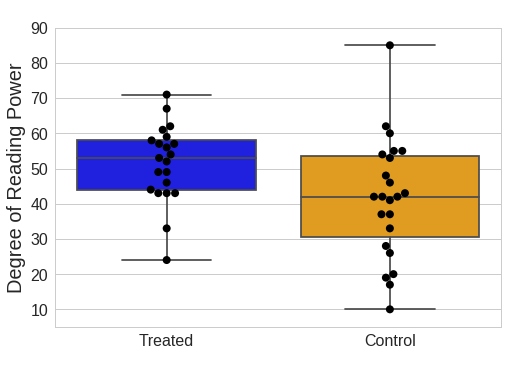

In [0]:
sns.boxplot(x="Treatment", y="Response", data=df,palette = {'b','orange'})
sns.swarmplot(x="Treatment", y="Response", data=df,color = 'k',size = 8)

plt.xlabel(' ',fontsize = 20)
plt.ylabel('Degree of Reading Power',fontsize = 20)
plt.title(' ',fontsize = 20)

plt.tick_params(labelsize = 16)


plt.show()

Use a q-q plot to assess how well a Normal distribution models the data.

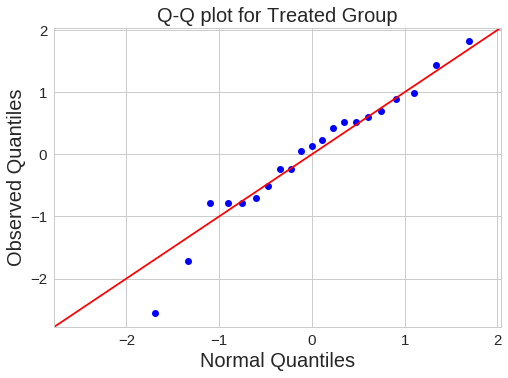

In [0]:
fig = sm.qqplot(df['Response'][df.Treatment == 'Treated'], dist="norm",fit = True,line = '45')
plt.xlabel('Normal Quantiles',fontsize=20)
plt.ylabel('Observed Quantiles',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Q-Q plot for Treated Group',fontsize=20)

plt.show()

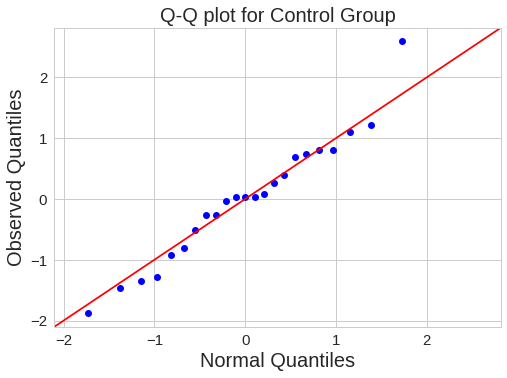

In [0]:
fig = sm.qqplot(df['Response'][df.Treatment == 'Control'], dist="norm",fit = True,line = '45')
plt.xlabel('Normal Quantiles',fontsize=20)
plt.ylabel('Observed Quantiles',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Q-Q plot for Control Group',fontsize=20)

plt.show()

### Compute the two-samples t confidence interval

In [0]:
#Define the samples
x1 = df[df.Treatment == 'Treated'].Response
x2 = df[df.Treatment == 'Control'].Response

#Get necessary stats
s1 = x1.describe()['std'] #can also use sd = np.std(x1,ddof = 1)
s2 = x2.describe()['std'] #can also use sd = np.std(x2,ddof = 1)
n1 = np.size(x1)
n2 = np.size(x2)

se1 = s1/np.sqrt(n1)
se2 = s2/np.sqrt(n2)

#Estimated standard error
se_val = np.sqrt(se1**2 + se2**2)

#Sample mean difference
mean_val = x1.describe()['mean'] - x2.describe()['mean']

#Degrees of freedom
v = (s1**2/n1 + s2**2/n2)**2/((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))

#Confidence level
c_level = 0.95

#Find the confidence interval
stats.t.interval(c_level,loc = mean_val, scale = se_val,df = v)

(1.2330200573390453, 18.67588263417234)

The confidence interval does not contain zero. Therefore we reach the conclusion that there is a difference in the means.

## Two-samples t test

We will use the directed reading data again, so we have alread done the initial steps of importing the data, creating a data frame, and plotting the data.

Perform the one-sided t-test. We will use SciPy's stats.ttest_ind, which performs a two-sided t test, so we will divide the resulting P-value by two.

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html

In [0]:
tstatistic, p = stats.ttest_ind(df[df.Treatment == 'Treated'].Response, df[df.Treatment == 'Control'].Response, equal_var = False)

In [0]:
p_value = p/2

print(p_value)

0.01319120641221239
